In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import numpy as np
import json
import tweepy as tw
import nltk
from nltk.corpus import stopwords
from nltk import bigrams
import re
import networkx
import networkx as nx
import warnings
warnings.filterwarnings("ignore")


## Data Processing

In [2]:
df=pd.read_csv('./dataset/network_tweets.csv')
data=df[['author_id', 'id', 'referenced_tweets_id','referenced_tweets_type', 'text', 'created_at', 'public_metrics','Source_author_id']]
data

,author_id,id,referenced_tweets_id,referenced_tweets_type,text,created_at,public_metrics,Source_author_id
0,126237449,1366668782677069831,1.366377e+18,retweeted,"RT @lsferguson: Hydroxychloroquine is a safe, ...",2021-03-02T08:36:43.000Z,"{'retweet_count': 1285, 'reply_count': 0, 'lik...",2.165198e+07
1,1245452098935730176,1366668731124838401,1.366110e+18,replied_to,"@GovInslee Anything helps thank you, @GovInsle...",2021-03-02T08:36:31.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1.077215e+09
2,348795749,1366668486567731201,NaN,NaN,When they say the second wave of the plandemic...,2021-03-02T08:35:33.000Z,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",NaN
3,1075763979778187264,1366668198364479488,1.366514e+18,replied_to,@PaulWaddington3 @ClarkeMicah I couldnt give a...,2021-03-02T08:34:24.000Z,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",6.330164e+08
4,270416438,1366667937298472960,1.366657e+18,replied_to,@MayorofLondon @BBCNews FUCK YOUR PLANdemic. W...,2021-03-02T08:33:22.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1.470012e+07
...,...,...,...,...,...,...,...,...
213105,3349241,1355667443784495107,1.355663e+18,quoted,Trump supporters are now shutting down vaccina...,2021-01-31T00:01:20.000Z,"{'retweet_count': 38, 'reply_count': 5, 'like_...",1.709431e+07
213106,1338046991914291201,1355379200404819971,NaN,NaN,Decoding in English on Dr. Li-Meng Yan’s Bombs...,2021-01-30T04:55:57.000Z,"{'retweet_count': 116, 'reply_count': 0, 'like...",NaN
213107,138182116,1355257433992671235,NaN,NaN,Our government is broken. \n\nOur economy is b...,2021-01-29T20:52:06.000Z,"{'retweet_count': 6701, 'reply_count': 1034, '...",NaN
213108,3308416363,1355638583688908817,1.355618e+18,replied_to,@SenTedCruz Your party abandoned all rights to...,2021-01-30T22:06:39.000Z,"{'retweet_count': 3, 'reply_count': 4, 'like_c...",NaN


In [3]:
data.dropna(subset=['Source_author_id'],inplace=True)
data

,author_id,id,referenced_tweets_id,referenced_tweets_type,text,created_at,public_metrics,Source_author_id
0,126237449,1366668782677069831,1.366377e+18,retweeted,"RT @lsferguson: Hydroxychloroquine is a safe, ...",2021-03-02T08:36:43.000Z,"{'retweet_count': 1285, 'reply_count': 0, 'lik...",2.165198e+07
1,1245452098935730176,1366668731124838401,1.366110e+18,replied_to,"@GovInslee Anything helps thank you, @GovInsle...",2021-03-02T08:36:31.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1.077215e+09
3,1075763979778187264,1366668198364479488,1.366514e+18,replied_to,@PaulWaddington3 @ClarkeMicah I couldnt give a...,2021-03-02T08:34:24.000Z,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",6.330164e+08
4,270416438,1366667937298472960,1.366657e+18,replied_to,@MayorofLondon @BBCNews FUCK YOUR PLANdemic. W...,2021-03-02T08:33:22.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1.470012e+07
5,1252904921416032256,1366667935390060544,1.366508e+18,retweeted,RT @VerumBellator1: PlanDemic 🔺️👁 https://t.co...,2021-03-02T08:33:21.000Z,"{'retweet_count': 32, 'reply_count': 0, 'like_...",9.177727e+17
...,...,...,...,...,...,...,...,...
213095,6073352,1355668574036127745,1.355662e+18,quoted,I will never ever ever understand my species. ...,2021-01-31T00:05:49.000Z,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",1.666468e+07
213098,15234991,1355668742626181121,1.355665e+18,quoted,we should really do bipartisanship with these ...,2021-01-31T00:06:30.000Z,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",3.153208e+07
213100,215207998,1355604333023408128,1.355577e+18,replied_to,"@GOPLeader Fuck off, Kevin. You scumbags kille...",2021-01-30T19:50:33.000Z,"{'retweet_count': 786, 'reply_count': 197, 'li...",1.973913e+07
213102,1043185714437992449,1355652748000288777,1.355650e+18,quoted,You caused the crisis. https://t.co/QbmqIfhkYT,2021-01-30T23:02:56.000Z,"{'retweet_count': 667, 'reply_count': 134, 'li...",1.749401e+07


In [4]:
data['referenced_tweets_id']=data['referenced_tweets_id'].astype(int)
data['Source_author_id']=data['Source_author_id'].astype(int)
data

,author_id,id,referenced_tweets_id,referenced_tweets_type,text,created_at,public_metrics,Source_author_id
0,126237449,1366668782677069831,1366377045694029824,retweeted,"RT @lsferguson: Hydroxychloroquine is a safe, ...",2021-03-02T08:36:43.000Z,"{'retweet_count': 1285, 'reply_count': 0, 'lik...",21651982
1,1245452098935730176,1366668731124838401,1366109545727098880,replied_to,"@GovInslee Anything helps thank you, @GovInsle...",2021-03-02T08:36:31.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1077214808
3,1075763979778187264,1366668198364479488,1366514380557402112,replied_to,@PaulWaddington3 @ClarkeMicah I couldnt give a...,2021-03-02T08:34:24.000Z,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",633016437
4,270416438,1366667937298472960,1366657340234231808,replied_to,@MayorofLondon @BBCNews FUCK YOUR PLANdemic. W...,2021-03-02T08:33:22.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",14700117
5,1252904921416032256,1366667935390060544,1366507984239566848,retweeted,RT @VerumBellator1: PlanDemic 🔺️👁 https://t.co...,2021-03-02T08:33:21.000Z,"{'retweet_count': 32, 'reply_count': 0, 'like_...",917772744405671936
...,...,...,...,...,...,...,...,...
213095,6073352,1355668574036127745,1355661567598223360,quoted,I will never ever ever understand my species. ...,2021-01-31T00:05:49.000Z,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",16664681
213098,15234991,1355668742626181121,1355664540843835392,quoted,we should really do bipartisanship with these ...,2021-01-31T00:06:30.000Z,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",31532083
213100,215207998,1355604333023408128,1355577151031017472,replied_to,"@GOPLeader Fuck off, Kevin. You scumbags kille...",2021-01-30T19:50:33.000Z,"{'retweet_count': 786, 'reply_count': 197, 'li...",19739126
213102,1043185714437992449,1355652748000288777,1355650350297001984,quoted,You caused the crisis. https://t.co/QbmqIfhkYT,2021-01-30T23:02:56.000Z,"{'retweet_count': 667, 'reply_count': 134, 'li...",17494010


In [5]:
data['Source_author_id'].unique()
data['Source_author_id'].value_counts()


1245651935706808320    11953
21651982                8423
1279751512785371136     7815
204444440               1982
1312605334075305984     1739
                       ...  
56413858                   1
385162904                  1
23985796                   1
1249041738758578176        1
882916598515998720         1
Name: Source_author_id, Length: 25850, dtype: int64

In [6]:
network_data = data[['author_id','Source_author_id','public_metrics','referenced_tweets_type']]
network_data 

,author_id,Source_author_id,public_metrics,referenced_tweets_type
0,126237449,21651982,"{'retweet_count': 1285, 'reply_count': 0, 'lik...",retweeted
1,1245452098935730176,1077214808,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",replied_to
3,1075763979778187264,633016437,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",replied_to
4,270416438,14700117,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",replied_to
5,1252904921416032256,917772744405671936,"{'retweet_count': 32, 'reply_count': 0, 'like_...",retweeted
...,...,...,...,...
213095,6073352,16664681,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",quoted
213098,15234991,31532083,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",quoted
213100,215207998,19739126,"{'retweet_count': 786, 'reply_count': 197, 'li...",replied_to
213102,1043185714437992449,17494010,"{'retweet_count': 667, 'reply_count': 134, 'li...",quoted


In [7]:
import ast
def set_public(metrics):
    metrics_dict = ast.literal_eval(metrics)
    retweet_count= int(metrics_dict['retweet_count'])
    reply_count= int(metrics_dict['reply_count'])
    like_count= int(metrics_dict['like_count'])
    quote_count= int(metrics_dict['quote_count'])
    weight=retweet_count+reply_count+like_count+quote_count+1
    return weight

network_data['public']=network_data['public_metrics'].apply(set_public)

network_data

,author_id,Source_author_id,public_metrics,referenced_tweets_type,public
0,126237449,21651982,"{'retweet_count': 1285, 'reply_count': 0, 'lik...",retweeted,1286
1,1245452098935730176,1077214808,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",replied_to,1
3,1075763979778187264,633016437,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",replied_to,2
4,270416438,14700117,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",replied_to,1
5,1252904921416032256,917772744405671936,"{'retweet_count': 32, 'reply_count': 0, 'like_...",retweeted,33
...,...,...,...,...,...
213095,6073352,16664681,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",quoted,16
213098,15234991,31532083,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",quoted,3
213100,215207998,19739126,"{'retweet_count': 786, 'reply_count': 197, 'li...",replied_to,7512
213102,1043185714437992449,17494010,"{'retweet_count': 667, 'reply_count': 134, 'li...",quoted,5038


In [8]:
network_data1=network_data[['author_id', 'Source_author_id']]
network_data1['weight']=0

In [9]:
network_data2= network_data1.groupby(['author_id', 'Source_author_id'], as_index=False).count()
network_data2

,author_id,Source_author_id,weight
0,2692,1163618839,1
1,2692,4098100355,1
2,12590,1964734532,1
3,12917,15812284,1
4,29283,102594136,1
...,...,...,...
130704,1366258591406059520,1366256222765150208,1
130705,1366261165668540425,1366256222765150208,1
130706,1366396931740741634,1307398223695417088,2
130707,1366400345312739334,1307398223695417088,2


In [10]:
network_data2.to_csv("./dataset/network.csv",index=False)

## Creat graph

### Graph 1：undirected graph
Node: Users

Edge: Retweeted, commented, quoted by users

Edge weight: public_metrics of the tweet

Edge attributes: retweets, quotes, comments

### Graph 2 : directed graph
Node: Users

Edge: Retweeted, commented, quoted by users

Edge weight: times between users Retweeted, commented, quoted 

In [10]:
G = nx.from_pandas_edgelist(network_data, 'Source_author_id', 'author_id', ["referenced_tweets_type", "public"])

In [11]:
G2 = nx.from_pandas_edgelist(network_data2, 'Source_author_id', 'author_id', ["weight"], create_using = nx.DiGraph())

## Attribute of the Graph

### node ,edge ,degree

In [12]:
print("Number of G1 nodes:",G.number_of_nodes())
print("Number of G1 edges:",G.size())

Number of G1 nodes: 100373
Number of G1 edges: 130173


In [13]:
print("Number of G2 nodes:",G2.number_of_nodes())
print("Number of G2 edges:",G2.size())

Number of G2 nodes: 100373
Number of G2 edges: 130709


### Degree: the degree of a node is the number of edges associated with that node

In [14]:
nx.degree_histogram(G)

[0,
 74833,
 12501,
 4626,
 2301,
 1426,
 898,
 692,
 447,
 358,
 267,
 204,
 202,
 156,
 126,
 89,
 91,
 82,
 51,
 65,
 59,
 56,
 49,
 37,
 28,
 22,
 27,
 34,
 22,
 22,
 18,
 24,
 25,
 26,
 19,
 16,
 10,
 16,
 17,
 16,
 9,
 10,
 15,
 9,
 7,
 11,
 13,
 9,
 10,
 7,
 12,
 5,
 2,
 6,
 4,
 4,
 8,
 7,
 6,
 4,
 4,
 8,
 2,
 4,
 4,
 5,
 3,
 4,
 5,
 2,
 4,
 4,
 9,
 3,
 5,
 2,
 4,
 3,
 2,
 5,
 6,
 1,
 5,
 3,
 1,
 4,
 4,
 5,
 4,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 4,
 1,
 1,
 1,
 0,
 0,
 0,
 3,
 2,
 1,
 1,
 3,
 2,
 2,
 0,
 3,
 3,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0

In [15]:
nx.degree_histogram(G2)

[0,
 74580,
 12640,
 4676,
 2308,
 1441,
 902,
 695,
 448,
 369,
 273,
 203,
 195,
 172,
 121,
 91,
 91,
 85,
 53,
 65,
 49,
 62,
 47,
 40,
 28,
 27,
 26,
 34,
 21,
 26,
 17,
 24,
 23,
 28,
 17,
 17,
 11,
 16,
 17,
 15,
 12,
 9,
 14,
 9,
 6,
 12,
 12,
 13,
 10,
 6,
 12,
 6,
 3,
 3,
 6,
 4,
 7,
 8,
 7,
 3,
 4,
 8,
 2,
 5,
 3,
 5,
 3,
 3,
 5,
 3,
 5,
 3,
 8,
 5,
 4,
 2,
 4,
 4,
 1,
 4,
 8,
 0,
 4,
 5,
 1,
 3,
 4,
 5,
 3,
 2,
 3,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 4,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 3,
 1,
 1,
 3,
 1,
 3,
 0,
 3,
 3,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 

##  Centrality

centrality is specific to a node and is used to characterise how important a node is in the overall network.

### degree centrality
Measured by dividing the degree of node(i) by (n - 1):

$ DCe_i = \frac {d(g)}{(n-1)}$

In [17]:
dc1=nx.degree_centrality(G)
maxdc1=max(dc1.values())
for key,value in dc1.items():
    if(value == max(dc1.values())):
        print(key,value)

1245651935706808320 0.11904714462200613


In [18]:
dc2=nx.degree_centrality(G2)
maxdc2=max(dc2.values())
maxdc2

0.11904714462200613

### Betweenness Centrality
The core idea of the metric is that on average node (i) occupies a large proportion of the shortest paths of any other two nodes (k) and (j). pi(kj) denotes the number of shortest paths between k and j that pass through node (i).

$ Ce_{i}^{B}(g)= ：\sum_{k \ne j;i\notin {k,j}} \frac{P_i(kj)/P(kj)}{(n-1(n-2)/2} $

In [18]:
nx.betweenness_centrality(G)

KeyboardInterrupt: 

In [ ]:
nx.betweenness_centrality(G2)

## Connectivity

In an undirected graph G, vi and vj are said to be connected if there is a path from vertex vi to vertex vj

A directed graph G is said to be strongly connected if, for any two distinct vertices vi and vj in V(G), there exist paths from vi to vj and from vj to vi

By replacing all the directed edges of a directed graph with undirected edges, the resulting graph is called the base graph of the original graph. A directed graph is a weakly connected graph if the base graph of the directed graph is a connected graph.


In [19]:
nx.number_connected_components(G)

6263

In [20]:
nx.number_strongly_connected_components(G2)

99564

In [21]:
nx.number_weakly_connected_components(G2)

6263

In [22]:
G_componrnts=nx.connected_components(G)
largest_components=max(G_componrnts,key=len)
print(largest_components)
print(len(largest_components))

{865865917741137920, 876490591101517824, 886256592831643648, 847844903782449155, 699214847578210304, 784761251150692357, 867923021746405376, 854021146462650368, 700758802425970688, 890650160769794048, 893466997089894401, 822474099825836035, 715149642418094084, 775156548502814724, 700792575544786949, 1370226720, 2999975971, 632815653, 104595495, 211025966, 4835770419, 2932604984, 341311547, 207880254, 487063619, 14417993, 1341229203673518080, 1337863336587890688, 1322482041062100992, 1332000118623637504, 138412111, 502530129, 19136595, 786432096, 1329944179250761729, 801806997884702721, 496762984, 1409548399, 30670965, 4074766457, 1347023822420119554, 78905469, 1346589141396557826, 935471466308558848, 1071920700938641408, 1088300096666591232, 1099888616363384832, 917772744405671936, 1360527492, 936238338356404224, 1043818145268490240, 776994955, 165413008, 1319895188, 246415512, 431489182, 2782396580, 3036938408, 87818409, 110887083, 50856112, 820996463459086336, 771315472671223808, 110

In [24]:
G2_componrnts=nx.strongly_connected_components(G2)
largest_components2=max(G2_componrnts,key=len)
print(largest_components2)
print(len(largest_components2))

{718835008870465536, 1256443835254665216, 730983088252170240, 882374629922361344, 793897671207641088, 875663233738313728, 1343667060556103680, 1257653326679805952, 819230764357349376, 735904952506257408, 712533194977968128, 23521289, 813739338831892480, 82978831, 82133012, 3948533781, 1675690008, 1368119336, 279087155, 457635895, 1165826514266415104, 1180829768, 40435788, 1115490384, 427329617, 539549787, 21565433, 34236531, 37019769, 1441308799, 1325154634898477056, 1333990316718821376, 1321001688279486464, 1341781893528883200, 1351688444163067904, 706863698976051200, 1259119868231553024, 1277739638409400320, 1195429607874236416, 1318620410116771840, 973000873, 403148973, 763376117428301824, 34107577, 1158551756, 975200486, 443818225, 796510482509209600, 764348431338971136, 704181782921486336, 753278309597847552, 1323083590570287104, 701473884885950464, 1323639809915691008, 1587964165, 915710427559895040, 2342166796, 833200400, 1862486293, 2957680925, 785334559, 402618667, 4773632302,

In [25]:
subgraph_nodes=list(largest_components2)
G2_subgraph=G2.subgraph(subgraph_nodes)
print("Number of G2_subgraph nodes:",G2_subgraph.number_of_nodes())
print("Number of G2_subgraph edges:",G2_subgraph.size())

Number of G2_subgraph nodes: 412
Number of G2_subgraph edges: 1051


### induced subgraph
Let the graph G = (V, E) and let S ⊂ V such that S is any vertex subset of G. Then the derived subgraph G(S) of G has the set of vertices S and the set of edges the set of edges of G whose two vertices both belong to S.

In [26]:
node_id = 21651982 
ego = nx.ego_graph(G, n=node_id, center=False) # Returns induced subgraph of neighbors centered at node, Excluding the central node in the diagram.
components = nx.connected_components(ego) 
for c in components: 
    print(c) 

{880443521005649920}
{761972408022597633}
{758503296076316672}
{1121417500372107267}
{806245731703128068}
{847844903782449155}
{784761251150692357}
{955110414496366599}
{1292204872012529672}
{1345043965846949888, 820742065663381504, 801445743454289920, 821480006144626688, 1008796502649495553, 1232029261168402432, 1148790854867247105, 1161138201232211974, 1255646263325884424, 1246587104781570052, 903118639045410816, 1360753260999675909, 1340691817294139397, 270043148, 840914119188455429, 1286452639564206087, 1110287678048747530, 2494210062, 1024685035281178635, 858519118101741570, 1261042883043393538, 825059185469554693, 2990055453, 53231656, 637138985, 898760756, 2600116279, 2910507070, 1341229203673518080, 43765849, 890173550, 560242800, 50882677, 1388896375, 1548449911, 1335136703418339328, 790915455976411136, 759511635870552064, 706123096806330368, 837333365363773440, 703959508079480833, 1247338945043501057, 2960939139, 1275942519130296320, 737852458865659904, 791851458241171457, 70

{102409025}
{562045767}
{1613964126}
{3029181299}
{151462791}
{424485775}
{115745687}
{2488837026}
{1059520918467297280}
{1202983280003432448}
{1173726490829176832}
{1140293557313519616}
{271590345, 53690285}
{32875472}
{414065617}
{2654413790}
{1475093473}
{243082212}
{1341843694173995010}
{948773875}
{189015028}
{27304952}
{2291475450}
{738837671477280768}
{734569098533699584}
{742083485586718720}
{281256964}
{1111392161570783233}
{636199955}
{620831766}
{4098237466}
{1155304593925890048}
{49292320}
{1277668264600952832}
{1276326137115729921}
{3310887992}
{69116985}
{4183893075}
{354919513}
{26715226}
{614016091}
{1271409027117977600}
{1276852756700172288}
{1149340329193213952}
{1239382375416696832}
{960226339629535232}
{1248384913759506432}
{120202359}
{2801214592, 142500359, 2378818687}
{635872385}
{968365063278137345}
{1229195488131518465}
{1313312822424735745}
{4902855818}
{178005137}
{2194449554}
{278570134}
{2547328153}
{2599920794}
{990660402861281282}
{2737349791}
{4052853920

{900219210}
{1007175963791241217}
{868532090127691777}
{1301491143792832513}
{324911439}
{109298004}
{115720535}
{1092795422161154050}
{1300192764307615746}
{46776683}
{136495475}
{1149157764}
{2747548045}
{56115598}
{563364243}
{239550872}
{4847583671}
{2225947069}
{147177929}
{3983196635}
{17744351}
{25182690}
{1032715862871080960}
{797459337463693312}
{814332002233188352}
{1237572900808523776}
{1446724086}
{564871671}
{1290359160836685825}
{1277989731561865217}
{1082294790035832833}
{822684444964388865}
{42418695}
{207274504}
{4859019791}
{2416493077}
{115655194}
{4705370663}
{3189289604}
{1263230171911520259}
{2159100477}
{32719456}
{17187426}
{293093998}
{766493294}
{374948469}
{2247606908}
{732361933538611200}
{738840196645539840}
{734179627275538432}
{368525958}
{838601462766784514}
{282280589}
{117064334}
{16728719}
{496550545}
{533283479}
{932627101}
{231097014}
{19055310}
{1325918957656809472}
{25150161}
{40551126}
{4854399704}
{32916187}
{747808244475830273}
{132961012767936

{1091521188730466305}
{883943356321198081}
{891492837468106753}
{713090640045817856}
{2367643545}
{385048489}
{2182471615}
{281632706}
{1478746051}
{813180971696590848}
{1053876188}
{2207604708}
{2423611375}
{774299640}
{921919484}
{1259413557910921216}
{1268212332485894144}
{828611337852968961}
{1342226344634146819}
{1256154973261488130}
{921375767354793984}
{922049036881879040}
{999734366673690624}
{1161722719119073281}
{736983152342622210}
{1355726813608042500}
{1262756599694647302}
{1329068529958543366}
{778606887394762758}
{363225099}
{1261460972973285385}
{1358516389796077579}
{125689877}
{216588310}
{2196660265}
{69623856}
{2311970880}
{1254907969}
{770794113277038592}
{1318752264543211520}
{1354618679552577536}
{15818841}
{539549787}
{1688461411}
{4037632102}
{1325719658}
{32890990}
{295788668}
{843786886405545984}
{1105817732707115008}
{966346795981856768}
{22274184}
{1002266796}
{23453877}
{239886538}
{438788310}
{1109549286}
{345858289}
{1095031124722704384}
{14835966}
{2379

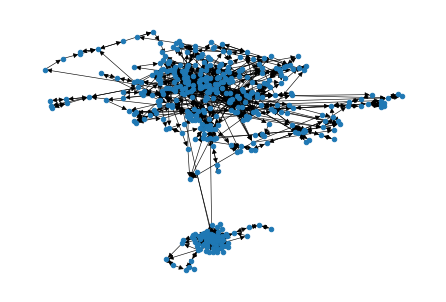

In [27]:
nx.draw(G2_subgraph,with_labels=False,node_size=20,width=0.6)
plt.draw()

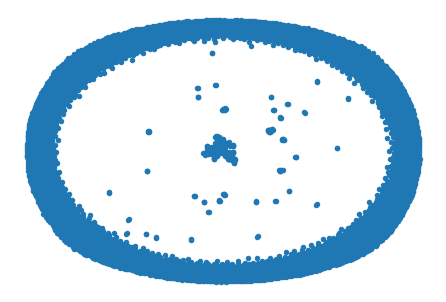

In [43]:
nx.draw(ego,with_labels=False,node_size=20,width=0.6)
plt.draw()

# community detection

Let the graph G = G(V,E), by community discovery we mean identifying nc(>=1) communities C={C1,C2,... ,Cnv}, such that the set of vertices of each community forms a cover of V.

If the intersection of the vertex sets of any two communities is empty, then C is said to be a non-overlapping community (disjoint communities); otherwise it is called an overlapping community (overlapping communities)

In [28]:
#Transformation of directed graphs into undirected graphs
H = G2_subgraph.to_undirected()
print("Number of H  nodes:",H.number_of_nodes())
print("Number of H  edges:",H.size())

Number of H  nodes: 412
Number of H  edges: 900


In [38]:
pip install karateclub

Note: you may need to restart the kernel to use updated packages.


In [44]:
from karateclub import LabelPropagation
model = LabelPropagation()
model.fit(G2)
cluster_membership = model.get_memberships()

AssertionError: The node indexing is wrong.

In [48]:
import community # --> http://perso.crans.org/aynaud/communities/
import fastcommunity as fg # --> https://networkx.lanl.gov/trac/ticket/245
import networkx as nx

g = nx.karate_club_graph()
partition = community.best_partition(g)
print("Louvain Modularity: ", community.modularity(partition, g))
print("Louvain Partition: ", partition)

cl = fg.communityStructureNewman(g)
print("Fastgreed Modularity: ", cl[0])
print ("Fastgreed Partition: ", cl[1])

AttributeError: module 'community' has no attribute 'best_partition'

In [49]:
import community
import networkx as nx
import matplotlib.pyplot as plt

#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
G = nx.erdos_renyi_graph(30, 0.05)

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

AttributeError: module 'community' has no attribute 'best_partition'

In [1]:
G2 = nx.karate_club_graph()
print('all nodes of Graph',G2.nodes())
print('all edges of Graph',G2.edges())

NameError: name 'nx' is not defined